In [3]:
import io
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
model_path = 'models/detection/faster_not_jit_rcnn_model.pt'
image_path = 'input/Pepper/Pepper__Mosaic/2N8A0169.JPG'

In [5]:
# make dictionary for class objects so we can call objects by their keys.
classes= {
    0: 'Corn Cercospora Leaf Spot',
    1: 'Corn Common Rust',
    2: 'Corn Healthy',
    3: 'Corn Streak',
    4: 'Corn Northern Leaf Blight',
    5: 'Pepper Leaf Curl',
    6: 'Pepper Cercospora',
    7: 'Pepper Leaf Blight',
    8: 'Pepper Bacterial Spot',
    9: 'Pepper Leaf Mosaic',
    10: 'Pepper Healthy',
    11: 'Pepper Fusarium',
    12: 'Pepper Septoria',
    13: 'Pepper Late Blight',
    14: 'Pepper Early Blight',
    15: 'Tomato Late Blight',
    16: 'Tomato Early Blight',
    17: 'Tomato Bacterial Spot',
    18: 'Tomato Septoria',
    19: 'Tomato Fusarium',
    20: 'Tomato Leaf Curl',
    21: 'Tomato Healthy',
    22: 'Tomato Mosaic'
}
classes

{0: 'Corn Cercospora Leaf Spot',
 1: 'Corn Common Rust',
 2: 'Corn Healthy',
 3: 'Corn Streak',
 4: 'Corn Northern Leaf Blight',
 5: 'Pepper Leaf Curl',
 6: 'Pepper Cercospora',
 7: 'Pepper Leaf Blight',
 8: 'Pepper Bacterial Spot',
 9: 'Pepper Leaf Mosaic',
 10: 'Pepper Healthy',
 11: 'Pepper Fusarium',
 12: 'Pepper Septoria',
 13: 'Pepper Late Blight',
 14: 'Pepper Early Blight',
 15: 'Tomato Late Blight',
 16: 'Tomato Early Blight',
 17: 'Tomato Bacterial Spot',
 18: 'Tomato Septoria',
 19: 'Tomato Fusarium',
 20: 'Tomato Leaf Curl',
 21: 'Tomato Healthy',
 22: 'Tomato Mosaic'}

In [13]:
class_list = list(classes.values())
class_list

['Corn Cercospora Leaf Spot',
 'Corn Common Rust',
 'Corn Healthy',
 'Corn Streak',
 'Corn Northern Leaf Blight',
 'Pepper Leaf Curl',
 'Pepper Cercospora',
 'Pepper Leaf Blight',
 'Pepper Bacterial Spot',
 'Pepper Leaf Mosaic',
 'Pepper Healthy',
 'Pepper Fusarium',
 'Pepper Septoria',
 'Pepper Late Blight',
 'Pepper Early Blight',
 'Tomato Late Blight',
 'Tomato Early Blight',
 'Tomato Bacterial Spot',
 'Tomato Septoria',
 'Tomato Fusarium',
 'Tomato Leaf Curl',
 'Tomato Healthy',
 'Tomato Mosaic']

In [8]:
model = torch.load(model_path, map_location='cpu')
# model.eval()

In [9]:
def obj_detector(img):
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
    img /= 255.0
    img = torch.from_numpy(img)
    img = img.unsqueeze(0)
    img = img.permute(0,3,1,2)

    # print(img.shape)

    model.eval()
    
    img = list(im for im in img)
    output = model(img)

    for i , _ in enumerate(img):
        boxes = output[i]['boxes'].data.cpu().numpy()
        scores = output[i]['scores'].data.cpu().numpy()
        _ = output[i]['labels'].data.cpu().numpy()
    
    sample = img[0].permute(1,2,0).cpu().numpy()
    sample = np.array(sample)
    boxes = output[0]['boxes'].data.cpu().numpy()
    name = output[0]['labels'].data.cpu().numpy()
    scores = output[0]['scores'].data.cpu().numpy()
    boxes = boxes.astype(np.int32)
    names = name.tolist()
    
    return names, boxes, sample, scores

In [10]:
names,boxes,sample, scores = obj_detector(image_path)

torch.Size([1, 3, 1280, 1920])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


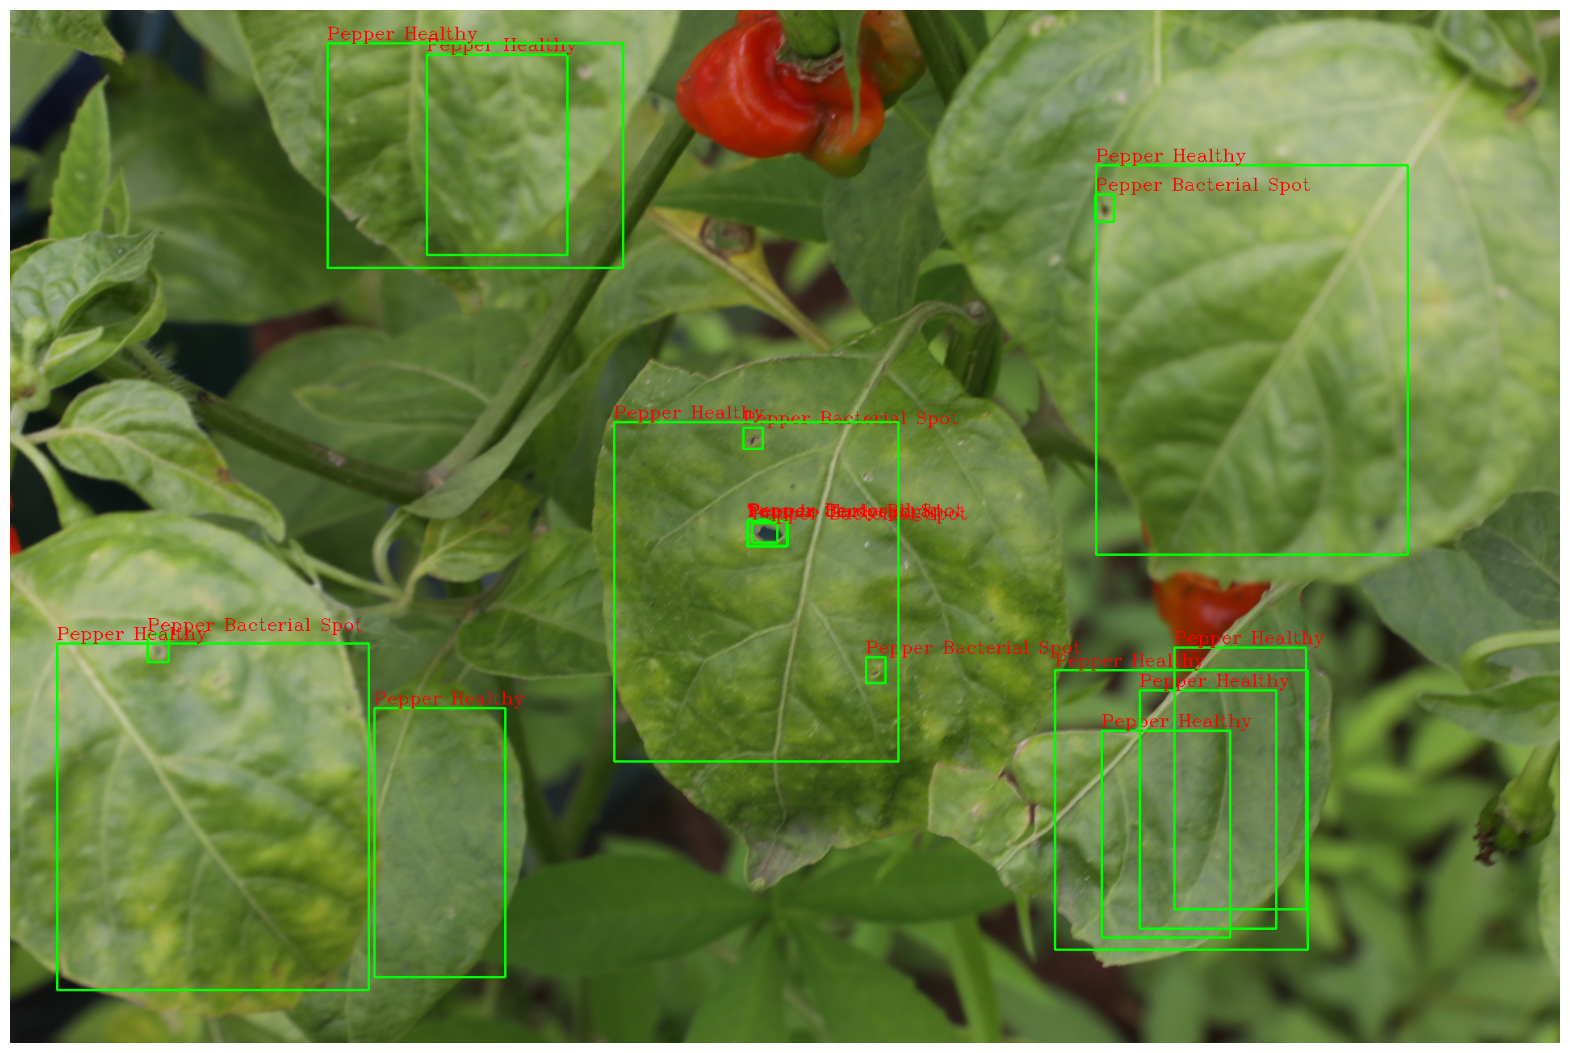

In [11]:
plt.figure(figsize=(20,60))
for i,box in enumerate(boxes):
        cv2.rectangle(
            sample,
            (box[0], box[1]),
            (box[2], box[3]),
            (0, 220, 0), 2
        )
        cv2.putText(
            sample, 
            classes[names[i]], 
            (box[0],box[1]-5),
            cv2.FONT_HERSHEY_COMPLEX ,
            0.7,
            (220,0,0),
            1,
            cv2.LINE_AA
        )  

plt.axis('off')
plt.imshow(sample)